In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('breast_analyzed.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [8]:
#target value (diagnosis)
df[['diagnosis']] .head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [10]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [15]:
#Get a count of the number of malignant(1)/very infectious and benign(0)/not harmful cells
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

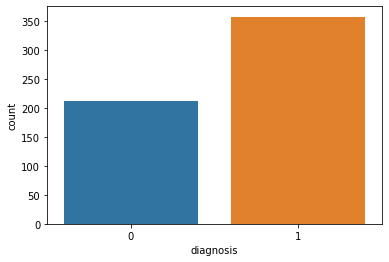

In [16]:
#Visualize the count
sns.countplot(df['diagnosis'], label = 'count')

In [17]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

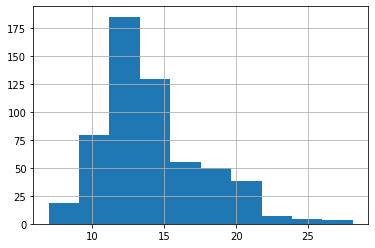

In [18]:
#visualize mean raduis
df.mean_radius.hist()

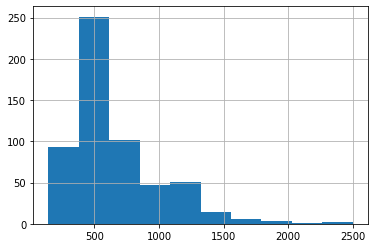

In [19]:
#visualize mean area
df.mean_area.hist()

In [20]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

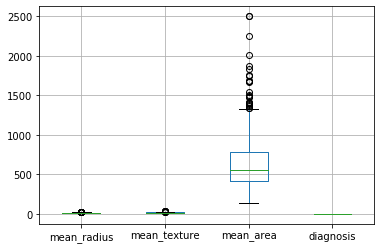

In [22]:
df.boxplot(column = ['mean_radius', 'mean_texture', 'mean_area','diagnosis'])

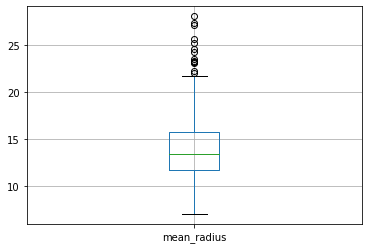

In [24]:
df.boxplot(column = ['mean_radius'])

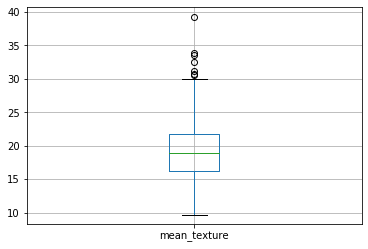

In [25]:
df.boxplot(column = ['mean_texture'])

In [26]:
#corelations
df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness', 'diagnosis']].corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


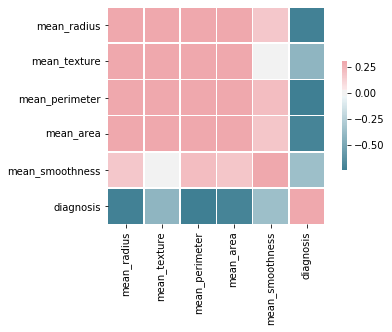

In [28]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness', 'diagnosis']].corr(),vmax=.3,
                center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})

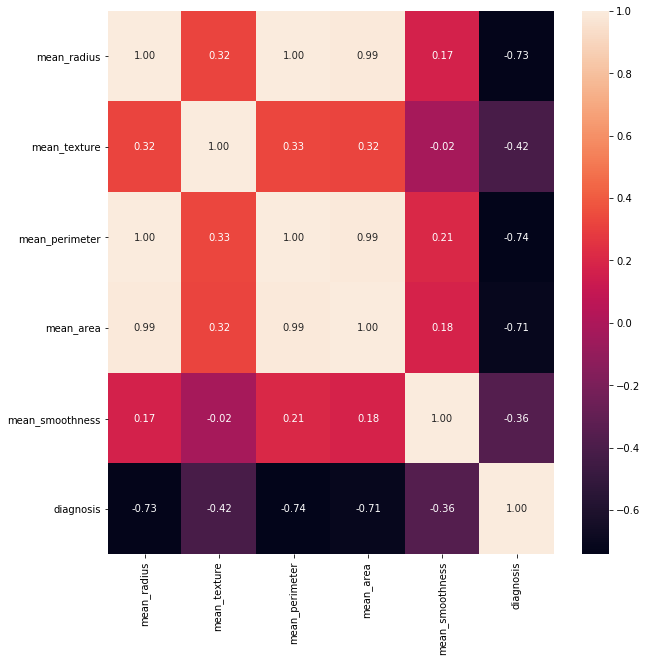

In [32]:
#Visualize the correlation
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')

In [33]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [34]:
#categorical data
df_cat = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness', 'diagnosis']]

graph for mean_radius: total = 456


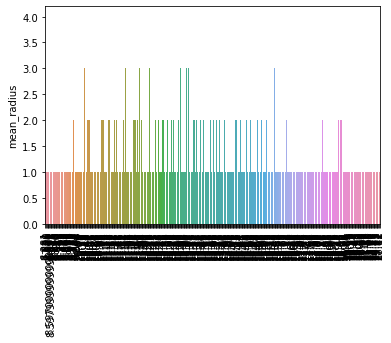

graph for mean_texture: total = 479


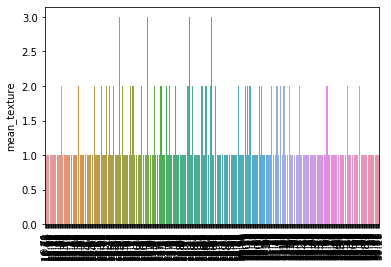

graph for mean_perimeter: total = 522


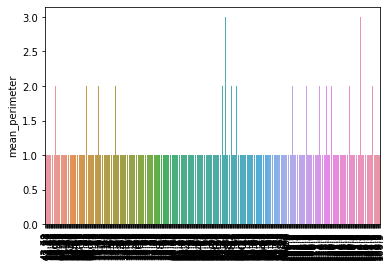

graph for mean_area: total = 539


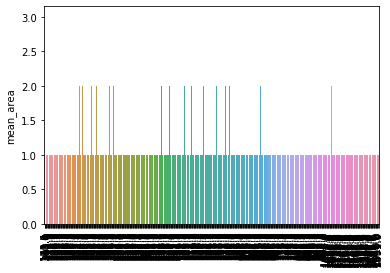

graph for mean_smoothness: total = 474


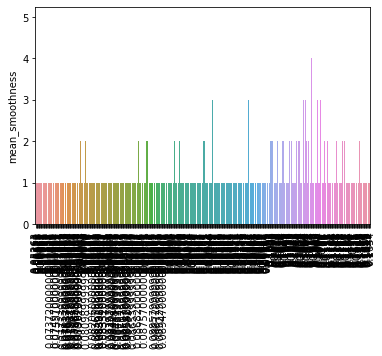

graph for diagnosis: total = 2


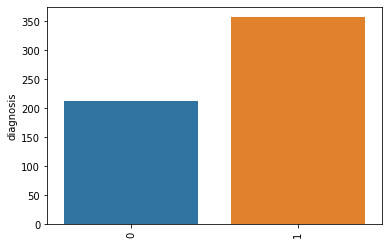

In [35]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num))) #string formating
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #changing labels horizontal
    plt.show()

In [36]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [37]:
pd.pivot_table(df, index = 'mean_radius',values = 'diagnosis')

,diagnosis
mean_radius,
6.981,1.0
7.691,1.0
7.729,1.0
7.760,1.0
8.196,1.0
...,...
25.220,0.0
25.730,0.0
27.220,0.0


the samller the mean raduis the more likely to have malignant cell (vis a vi)

In [38]:
pd.pivot_table(df, index = 'mean_perimeter',values = 'diagnosis')

,diagnosis
mean_perimeter,
43.79,1.0
47.92,1.0
47.98,1.0
48.34,1.0
51.71,1.0
...,...
171.50,0.0
174.20,0.0
182.10,0.0


the bigger the perimeter the less changes of having benign cell (vis a vi)

In [39]:
pd.pivot_table(df, index = 'mean_smoothness',values = 'diagnosis')

,diagnosis
mean_smoothness,
0.05263,1.0
0.06251,1.0
0.06429,1.0
0.06576,1.0
0.06613,1.0
...,...
0.13710,1.0
0.13980,0.0
0.14250,0.0


In [40]:
df_pivots = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness', 'diagnosis']]

In [41]:
#multiple_pivote table
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'diagnosis').sort_values('diagnosis',ascending = False))



mean_radius
             diagnosis
mean_radius           
6.981              1.0
12.960             1.0
12.750             1.0
12.760             1.0
12.780             1.0
...                ...
16.600             0.0
16.650             0.0
16.690             0.0
16.740             0.0
28.110             0.0

[456 rows x 1 columns]
mean_texture
              diagnosis
mean_texture           
9.71                1.0
18.84               1.0
18.29               1.0
18.24               1.0
18.22               1.0
...                 ...
21.24               0.0
21.31               0.0
21.35               0.0
21.38               0.0
39.28               0.0

[479 rows x 1 columns]
mean_perimeter
                diagnosis
mean_perimeter           
43.79                 1.0
82.71                 1.0
83.51                 1.0
83.19                 1.0
83.18                 1.0
...                   ...
103.80                0.0
104.10                0.0
105.10                0.0
105.70         

ValueError: Grouper for 'diagnosis' not 1-dimensional

In [46]:
#word cloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

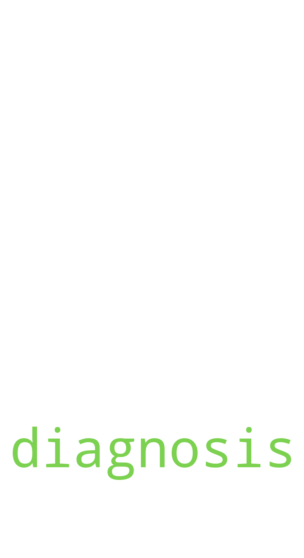

In [48]:


#words = " ".join(kobe_data.text.drop_duplicates())
words = " ".join(df)


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text  = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,  stopwords=STOPWORDS, max_words = 20,width = 800,height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

